In [185]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [186]:
ls

4_autoML_telescope_TPOT.ipynb  keras_sub6.csv         Sunkeras.ipynb
keras_sub2.csv                 keras_sub7.csv         test_df.csv
keras_sub3.csv                 keras_sub.csv          torch_sub.csv
keras_sub4.csv                 Pytorch.ipynb          train_df.csv
keras_sub5.csv                 sample_submission.csv


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [190]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [191]:
print(test.shape)
test.head()

(18000, 785)


,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train.drop(labels = ['label'], axis = 1)
y = train['label']

In [ ]:
test_temp = test.iloc[:, 1:] # 1행 제외

In [ ]:
# 정규화
X_train = X / 255 # X(max) == 255
X_test = test_temp / 255

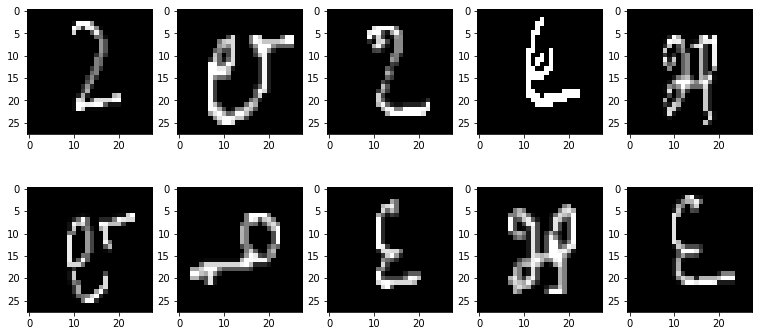

In [196]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train.values[i].reshape(28,28), cmap='gray', interpolation='nearest')

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=2020)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


# 1. Base Neural Network

In [198]:
num_classes = 10
model = Sequential()
model

In [ ]:
model.add(Dense(256, input_dim = 784))
model.add(BatchNormalization())
model.add(Dense(128, activation  = 'relu'))
model.add(BatchNormalization())
model.add(Dense(64))
model.add(Dense(num_classes, activation = 'softmax'))

In [200]:
model.compile(optimizer = RAdamOptimizer(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                650       
Total params: 244,298
Trainable params: 243,530
Non-trainable params: 768
_____________________________________________

In [201]:
history = model.fit(X_train, y_train, batch_size=512, epochs=20, validation_data=[X_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 2s 64us/sample - loss: 1.4275 - acc: 0.5593 - val_loss: 1.0947 - val_acc: 0.8677
Epoch 2/20
33600/33600 [==============================] - 1s 35us/sample - loss: 0.2843 - acc: 0.9224 - val_loss: 0.5199 - val_acc: 0.9383
Epoch 3/20
33600/33600 [==============================] - 1s 35us/sample - loss: 0.1679 - acc: 0.9558 - val_loss: 0.2662 - val_acc: 0.9563
Epoch 4/20
33600/33600 [==============================] - 1s 36us/sample - loss: 0.1218 - acc: 0.9675 - val_loss: 0.1615 - val_acc: 0.9668
Epoch 5/20
33600/33600 [==============================] - 1s 36us/sample - loss: 0.0947 - acc: 0.9743 - val_loss: 0.1189 - val_acc: 0.9711
Epoch 6/20
33600/33600 [==============================] - 1s 35us/sample - loss: 0.0758 - acc: 0.9797 - val_loss: 0.0975 - val_acc: 0.9746
Epoch 7/20
33600/33600 [==============================] - 1s 36us/sample - loss: 0.0611 - acc: 0.9839 - val_loss: 0.0

In [ ]:
def makePlot(history):
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(history.history['loss'], 'y', label='train loss')
  loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='upper left')

  acc_ax.plot(history.history['acc'], 'b', label='train acc')
  acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='upper left')

  plt.show()

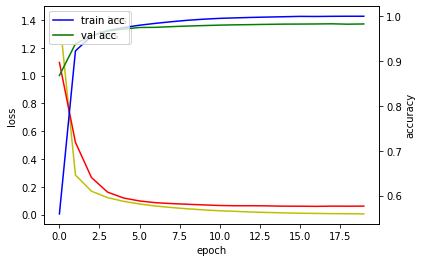

In [206]:
makePlot(history)

In [ ]:
def makeSub(X_test, sample, i):
  prediction = model.predict_classes(X_test)
  sample['Category'] = pd.Series(prediction)
  sample.to_csv('keras_sub{}.csv'.format(i), index = False)

In [ ]:
makeSub(X_test, sample_submission, 1)

# 2. CNN - Convolutional Neural Network

   - CNN은 사람의 시신경 구조를 모방한 구조
   - 데이터를 feature(특징, 차원)로 추출하여 이 feature들의 패턴을 파악하는 구조
   - Convolution 과정과 Pooling 과정을 통해 진행
   - Convolution Layer 와 Pooling Layer를 복합적으로 구성하여 알고리즘을 구현
   - CNN은 보통 정보추출(Information Extraction), 문장분류(Sentence Classification), 얼굴인식(Face Recognition)에 사용

Conv2D(32, (5,5), padding = 'valid', input_shape = (28,28,1), activation = 'relu')

   - 첫번째 인자 : 컨볼루션 필터의 수
   - 두번째 인자 : 컨볼루션 커널의 (행, 열)
   - padding : 경계 처리 방법
      - 'valid' : 유효한 영역만 출력
      - 'same' : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
   - input_shape : 샘플 수를 제외한 입력 형태를 정의
      - (행, 열, 채널 수) 로 정의 흑백은 1, 컬러는 3
   - activation : 활성화 함수 설정


MaxPool2D(pool_size = (2,2))
   - pool_size : 수직, 수평 축소 비율을 지정

Flatten()
   - 컨볼루션 레이어, 맥스풀링 레이어를 반복적으로 거치면 주요 특징만 추출되어 학습됨
   - 컨볼루션 레이어나 맥스풀링 레이어는 주로 2차원 자료를 다루지만 전결합층에 전달하기 위해선 1차원 자료로 변환해줘야 함

Dense(8, input_dim = 4, init = 'uniform', activation = 'relu')
   - 첫번째 인자 : 출력 뉴런의 수
   - input_dim : 입력 뉴런의 수
   - init : 가중치 초기화 방법
      - 'uniform' : 균일 분포
      - 'normal' : 가우시안 분포
   - activation : 활성화 함수 설정


In [ ]:
X_train = X / 255 # X(max) == 255
X_test = test_temp / 255

In [ ]:
# 컨볼루션을 위한 매트릭스로 변형
# # must reshape the date to make it Keras friendly.
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0],28, 28, 1)

In [240]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=2020)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (33600,) (8400,)


In [241]:
model = Sequential() # Sequential 모델, 층을 차례대로 쌓음
model

In [ ]:
input_shape = X_train[0].shape
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) #
model.add(Conv2D(64, (3,3), activation='relu')) # 
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25)) # Dropout 은 랜덤하게 선택한 뉴런을 비활성화 시키는 기멉, 동조현상이 발생한 뉴런을 삭제하는 효과로 overfitting을 방지할 수도 있음, 비율을 말함 25%
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='softmax'))

In [44]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=41faf0f12a4656740cf5f82ed91402eafad8e4342572a16a64cc6c47381deaa8
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [ ]:
from keras_radam.training import RAdamOptimizer

In [244]:
model.compile(optimizer = RAdamOptimizer(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               2359552   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)             

In [245]:
history = model.fit(X_train, y_train, batch_size=512, epochs=50, validation_data=[X_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 2s 63us/sample - loss: 3.1688 - acc: 0.4258 - val_loss: 0.4058 - val_acc: 0.9088
Epoch 2/50
33600/33600 [==============================] - 1s 38us/sample - loss: 0.3570 - acc: 0.8933 - val_loss: 0.1610 - val_acc: 0.9571
Epoch 3/50
33600/33600 [==============================] - 1s 38us/sample - loss: 0.1962 - acc: 0.9433 - val_loss: 0.1250 - val_acc: 0.9658
Epoch 4/50
33600/33600 [==============================] - 1s 38us/sample - loss: 0.1535 - acc: 0.9556 - val_loss: 0.1021 - val_acc: 0.9711
Epoch 5/50
33600/33600 [==============================] - 1s 38us/sample - loss: 0.1254 - acc: 0.9636 - val_loss: 0.0901 - val_acc: 0.9746
Epoch 6/50
33600/33600 [==============================] - 1s 37us/sample - loss: 0.1041 - acc: 0.9694 - val_loss: 0.0745 - val_acc: 0.9779
Epoch 7/50
33600/33600 [==============================] - 1s 38us/sample - loss: 0.0855 - acc: 0.9745 - val_loss: 0.0

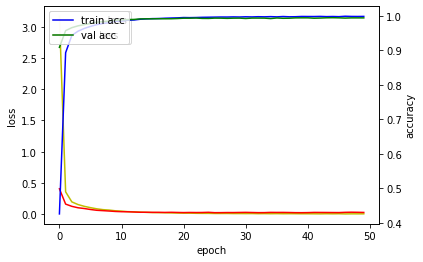

In [246]:
makePlot(history)

In [ ]:
makeSub(X_test, sample_submission, 2)

# 3. Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 데이터 증식을 위해 ImageDataGenerator 사용
gen = ImageDataGenerator(rotation_range=15, # 이미지를 최대 15도 회전
                        width_shift_range=0.15, # 이미지를 좌우 이동 15% (픽셀기준) 
                        height_shift_range=0.15, # 이미지를 상하 이동 15% (픽셀기준) 
                        shear_range=0.15, # 0.15 라디안 내외로 시계 반대방향으로 변형 (밀림 강도 범위내에서 임의로 원본이미지를 변형)
                        zoom_range=0.5) # 1 - 0.4 ~ 1+ 0.4 범위로 확대/축소

In [ ]:
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [ ]:
input_shape = X_train[0].shape
model = Sequential() # Sequential 모델, 층을 차례대로 쌓음
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape)) #
model.add(Conv2D(64, (3,3), activation='relu')) # 
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25)) # Dropout 은 랜덤하게 선택한 뉴런을 비활성화 시키는 기멉, 동조현상이 발생한 뉴런을 삭제하는 효과로 overfitting을 방지할 수도 있음, 비율을 말함 25%
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='softmax'))

In [267]:
model.compile(optimizer = RAdamOptimizer(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 256)               2359552   
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)             

In [268]:
history = model.fit_generator(generator=batches,
                            steps_per_epoch=512,
                            epochs=30,
                            validation_data=val_batches,
                            validation_steps=50)

Epoch 1/30
512/512 [==============================] - 13s 25ms/step - loss: 1.5858 - acc: 0.5166 - val_loss: 0.5659 - val_acc: 0.8222
Epoch 2/30
512/512 [==============================] - 11s 21ms/step - loss: 0.5628 - acc: 0.8167 - val_loss: 0.3202 - val_acc: 0.9041
Epoch 3/30
512/512 [==============================] - 11s 21ms/step - loss: 0.4085 - acc: 0.8691 - val_loss: 0.2370 - val_acc: 0.9206
Epoch 4/30
512/512 [==============================] - 11s 21ms/step - loss: 0.3456 - acc: 0.8874 - val_loss: 0.1885 - val_acc: 0.9419
Epoch 5/30
512/512 [==============================] - 11s 21ms/step - loss: 0.2957 - acc: 0.9044 - val_loss: 0.1706 - val_acc: 0.9466
Epoch 6/30
512/512 [==============================] - 11s 21ms/step - loss: 0.2641 - acc: 0.9129 - val_loss: 0.1397 - val_acc: 0.9544
Epoch 7/30
512/512 [==============================] - 11s 21ms/step - loss: 0.2404 - acc: 0.9227 - val_loss: 0.1502 - val_acc: 0.9522
Epoch 8/30
512/512 [==============================] - 11s 21ms

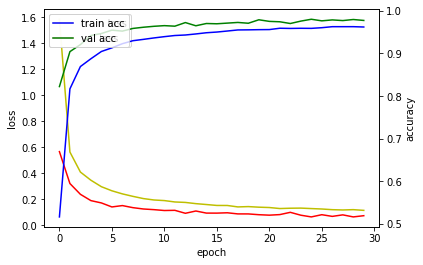

In [269]:
# 실패..
# 데이터 증식 후에 모델에 어떻게 적용하는지 다시 한번 알아봐야 할 듯
makePlot(history)

In [ ]:
makeSub(X_test, sample_submission, 300)

# 4. Adding Batch Normalization

###### 출처 : https://www.kaggle.com/poonaml/deep-neural-network-keras-way

In [273]:
model = Sequential([
        Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
        BatchNormalization(axis=1),
        Conv2D(32,(3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(axis=1),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Conv2D(64,(3,3), activation='relu'),
        MaxPool2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
model.compile(optimizer = RAdamOptimizer(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_28 (Batc (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 12, 12, 32)        48        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_30 (Batc (None, 10, 10, 64)      

In [274]:
history = model.fit(X_train, y_train, batch_size=512, epochs=50, validation_data=[X_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 4s 112us/sample - loss: 0.6856 - acc: 0.7864 - val_loss: 2.3858 - val_acc: 0.1045
Epoch 2/50
33600/33600 [==============================] - 2s 51us/sample - loss: 0.0804 - acc: 0.9782 - val_loss: 2.6529 - val_acc: 0.1045
Epoch 3/50
33600/33600 [==============================] - 2s 51us/sample - loss: 0.0428 - acc: 0.9890 - val_loss: 2.2595 - val_acc: 0.1729
Epoch 4/50
33600/33600 [==============================] - 2s 51us/sample - loss: 0.0255 - acc: 0.9946 - val_loss: 2.0486 - val_acc: 0.1880
Epoch 5/50
33600/33600 [==============================] - 2s 51us/sample - loss: 0.0160 - acc: 0.9970 - val_loss: 1.2343 - val_acc: 0.5046
Epoch 6/50
33600/33600 [==============================] - 2s 50us/sample - loss: 0.0104 - acc: 0.9987 - val_loss: 0.3822 - val_acc: 0.9086
Epoch 7/50
33600/33600 [==============================] - 2s 51us/sample - loss: 0.0072 - acc: 0.9992 - val_loss: 0.

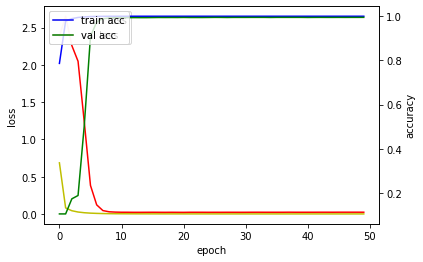

In [275]:
makePlot(history)

In [ ]:
makeSub(X_test, sample_submission, 1000)